# HR Analytics predicting and understanding employee attrition

## 1 Phase - Data Management

In [6]:
import pandas as pd
import numpy as np

att = pd.read_csv("C:/Users/Windows/PycharmProjects/DSprojects/HR Project/Emp_Attrition.csv")
demo = pd.read_csv("C:/Users/Windows/PycharmProjects/DSprojects/HR Project/Emp_Demo.csv")
inc = pd.read_csv("C:/Users/Windows/PycharmProjects/DSprojects/HR Project/Emp_Income.csv")
det = pd.read_csv("C:/Users/Windows/PycharmProjects/DSprojects/HR Project/Emp_Job Details.csv")

#### We will fix issues and errors we have found, like datatype, blank cells and NaN.

In [7]:
empty = inc.isna().sum().sum() # To check empty values
print(empty)

b = inc[inc["EmpId"].isin([100015, 100038])] # NaN values
print(b)

2
     EmpId  StandardHours  HourlyRate MonthlyIncome  PercentSalaryHike  \
14  100015            200         NaN                               14   
37  100038            200         NaN                               13   

    StockOptionLevel  
14                 0  
37                 0  


In [8]:
# Drop NaN, 0 values.
inc = inc.drop(index=14)
inc = inc.drop(index=37)

In [9]:
# To find duplicates values
det.duplicated().sum()
duplicates = det[det.duplicated()]
duplicates

,EmpId,BusinessTravel,Department,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,PerformanceRating,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime
149,100145,Travel_Frequently,Sales,2,Sales Executive,4,0,3,200,9,2,4,8,7,0,7,No


In [10]:
# Drop duplicated value and view
det = det.drop(index=148)
rows = det.iloc[[146,147,148,149]]
rows

,EmpId,BusinessTravel,Department,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,PerformanceRating,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime
146,100143,Travel_Rarely,Research & Development,2,Research Scientist,3,3,4,200,19,2,3,3,2,2,2,Yes
147,100144,Travel_Rarely,Research & Development,1,Research Scientist,3,1,3,200,5,4,2,5,4,0,4,No
149,100145,Travel_Frequently,Sales,2,Sales Executive,4,0,3,200,9,2,4,8,7,0,7,No
150,100146,Travel_Rarely,Research & Development,1,Research Scientist,1,5,3,200,8,3,3,3,2,2,2,No


In [11]:
new1 = pd.merge(att,demo, on = 'EmpId')
new2 = pd.merge(inc,det, on = 'EmpId')
master_data = pd.merge(new1,new2, on = 'EmpId')
# pd.options.display.max_columns = 100 If we want to display all the columns
master_data.head(5)

,EmpId,Attrition,Department_x,Age,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,StandardHours_x,...,PerformanceRating,StandardHours_y,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime
0,100001,Yes,Sales,41,1,2,Life Sciences,Female,Single,200,...,3,200,8,0,1,6,4,0,5,Yes
1,100002,No,Research & Development,49,8,1,Life Sciences,Male,Married,200,...,4,200,10,3,3,10,7,1,7,No
2,100003,Yes,Research & Development,37,2,2,Other,Male,Single,200,...,3,200,7,3,3,0,0,0,0,Yes
3,100004,No,Research & Development,33,3,4,Life Sciences,Female,Married,200,...,3,200,8,3,3,8,7,3,0,Yes
4,100005,No,Research & Development,27,2,1,Medical,Male,Married,200,...,3,200,6,3,3,2,2,2,2,No


In [12]:
master_data["MonthlyIncome"] = master_data["MonthlyIncome"].astype("int64")
master_data["HourlyRate"] = master_data["HourlyRate"].astype("int64")
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmpId                    1473 non-null   int64 
 1   Attrition                1473 non-null   object
 2   Department_x             1473 non-null   object
 3   Age                      1473 non-null   int64 
 4   DistanceFromHome         1473 non-null   int64 
 5   Education                1473 non-null   int64 
 6   EducationField           1473 non-null   object
 7   Gender                   1473 non-null   object
 8   MaritalStatus            1473 non-null   object
 9   StandardHours_x          1473 non-null   int64 
 10  HourlyRate               1473 non-null   int64 
 11  MonthlyIncome            1473 non-null   int64 
 12  PercentSalaryHike        1473 non-null   int64 
 13  StockOptionLevel         1473 non-null   int64 
 14  BusinessTravel           1473 non-null  

In [13]:
# Department_x and Department_y have the same values. We will drop one of them.
master_data = master_data.drop('Department_y', axis=1)

# StandardHours_x and StandardHours_y have the same values. But there is no valuable information.
master_data = master_data.drop('StandardHours_x', axis=1)
master_data = master_data.drop('StandardHours_y', axis=1)

In [17]:
master_data_1 = master_data.copy()

master_data_1 = master_data_1.drop('EmpId', axis=1)

#To convert in Binary: Attrition, Gender, OverTime
master_data_1["Attrition"] = master_data_1["Attrition"].apply(lambda x: 1 if x == 'Yes' else 0)
master_data_1["Gender"] = master_data_1["Gender"].apply(lambda x: 1 if x == 'Male' else 0)
master_data_1["OverTime"] = master_data_1["OverTime"].apply(lambda x: 1 if x == 'Yes' else 0)

master_data_2 = master_data_1.copy() # For Quick Visualization


#### Phase - Quick Visualization

In [18]:
master_data_2.Education.value_counts() # Number of values
master_data_2.JobLevel.value_counts()
master_data_2.JobRole.value_counts()
master_data_2.StockOptionLevel.value_counts()
master_data_2.MaritalStatus.value_counts()
master_data_2.BusinessTravel.value_counts()
master_data_2.EducationField.value_counts()
master_data_2.Education.value_counts()

Education
3    571
4    398
2    285
1    170
5     49
Name: count, dtype: int64

In [20]:
# One hot encoding
master_data_2 = master_data_2.join(pd.get_dummies(master_data_2["BusinessTravel"])).drop('BusinessTravel', axis=1)
master_data_2 = master_data_2.join(pd.get_dummies(master_data_2["Department_x"], prefix='Department')).drop('Department_x', axis=1)
master_data_2 = master_data_2.join(pd.get_dummies(master_data_2["EducationField"], prefix='EducationField')).drop('EducationField', axis=1)
master_data_2 = master_data_2.join(pd.get_dummies(master_data_2["JobRole"], prefix='JobR')).drop('JobRole', axis=1)
master_data_2 = master_data_2.join(pd.get_dummies(master_data_2["MaritalStatus"], prefix='MaritalStat')).drop('MaritalStatus', axis=1)

# Boolean being managed
master_data_2 = master_data_2.map(lambda x: 1 if x is True else 0 if x is False else x)
master_data_2.sample(3)

,Attrition,Age,DistanceFromHome,Education,Gender,HourlyRate,MonthlyIncome,PercentSalaryHike,StockOptionLevel,JobLevel,...,JobR_Laboratory Technician,JobR_Manager,JobR_Manufacturing Director,JobR_Research Director,JobR_Research Scientist,JobR_Sales Executive,JobR_Sales Representative,MaritalStat_Divorced,MaritalStat_Married,MaritalStat_Single
118,0,34,5,3,0,58,11631,12,0,3,...,0,1,0,0,0,0,0,0,0,1
1164,0,38,2,2,0,39,7756,19,1,3,...,0,0,1,0,0,0,0,0,1,0
110,0,25,7,1,1,14,2889,11,2,1,...,0,0,0,0,1,0,0,0,1,0


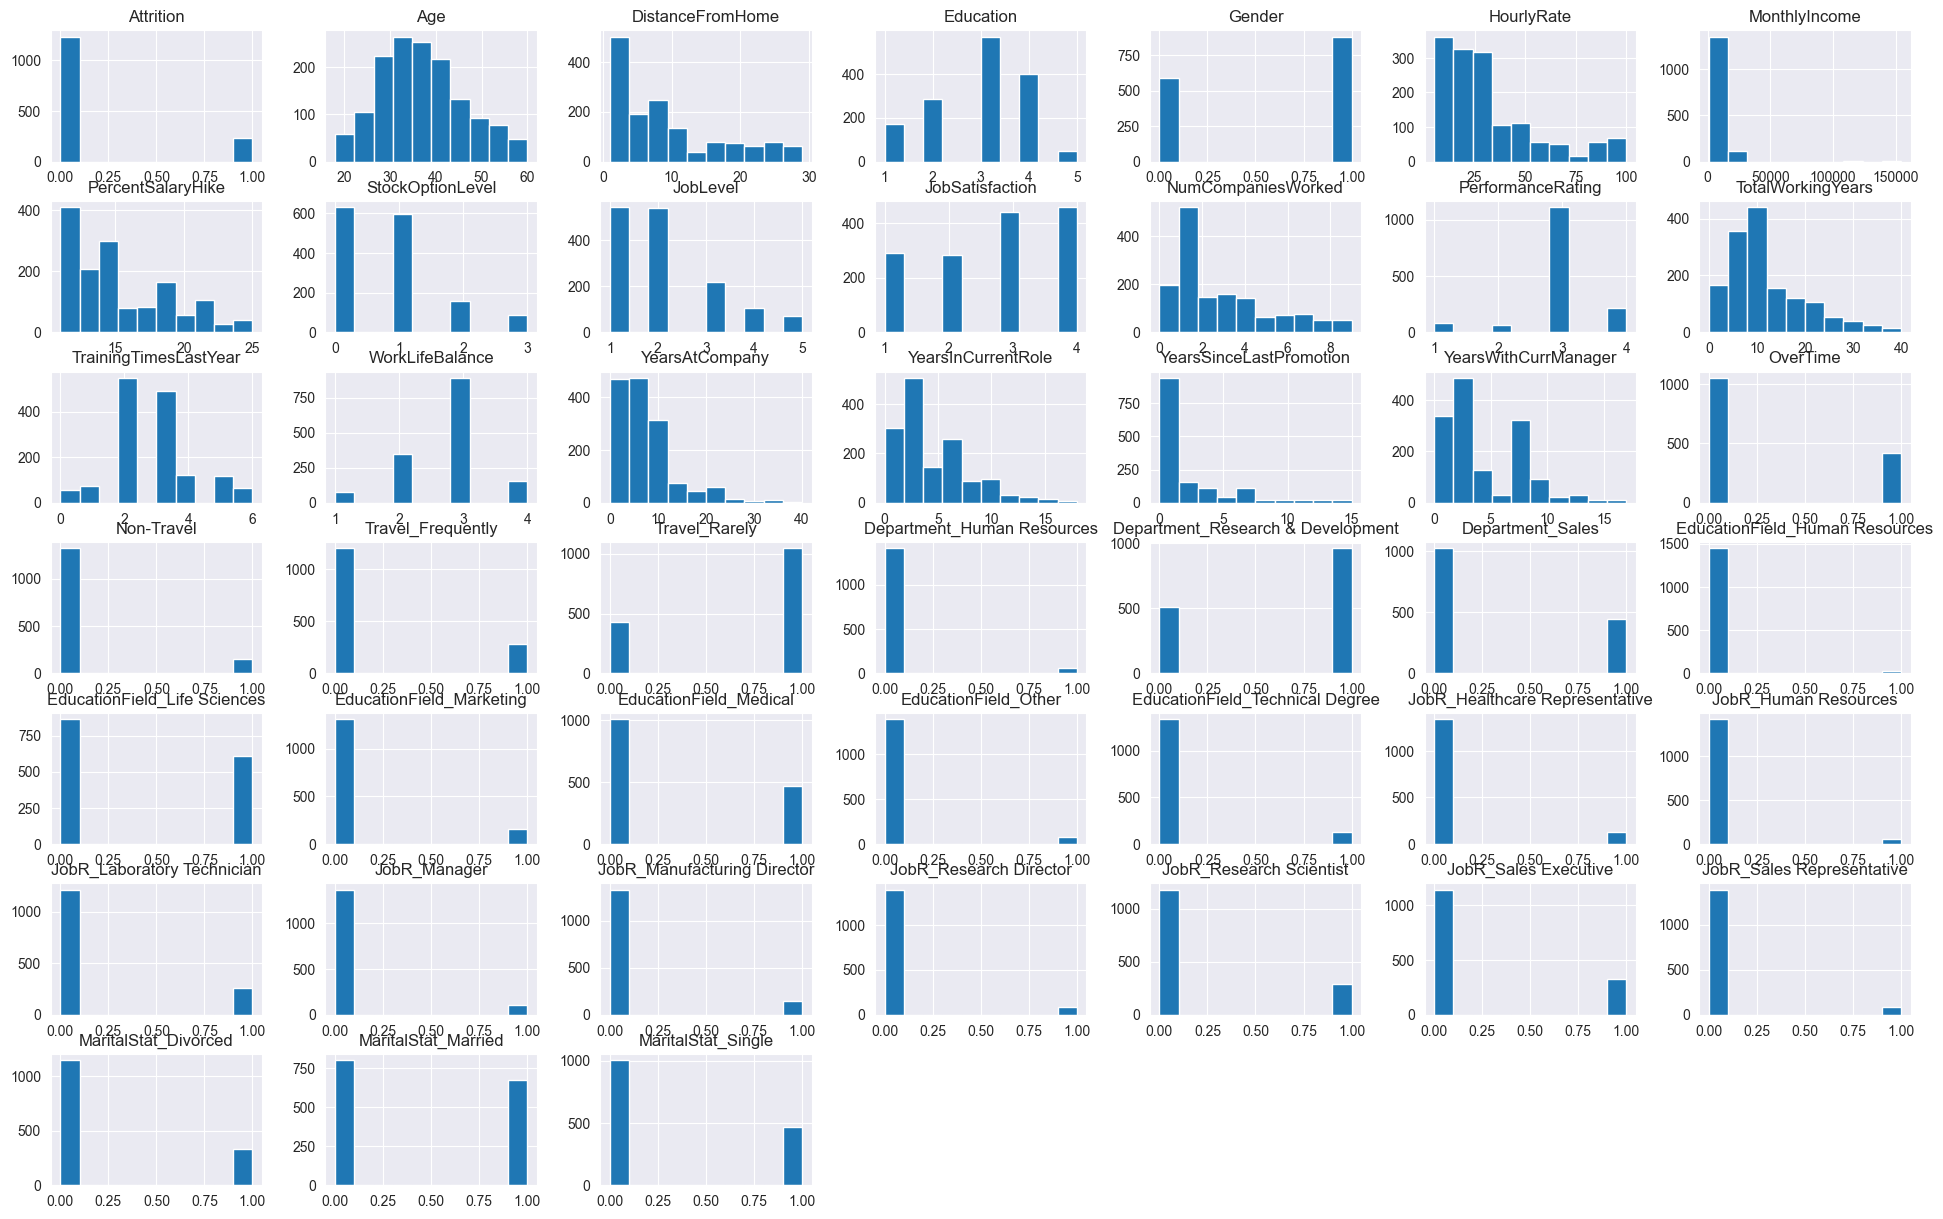

In [21]:
# Histogram
import matplotlib.pyplot as plt

master_data_2.hist(figsize=(24,15))
plt.show()

In [23]:
# 6. Finally, we detect our attrition rate using the formula and obtaining a %

attrition_rate = (master_data_1['Attrition'].value_counts()[1] / len(master_data)) * 100

print(f"Overall Attrition Rate: {attrition_rate:.2f}%")

Overall Attrition Rate: 16.09%


## 2 Phase - Data Analysis

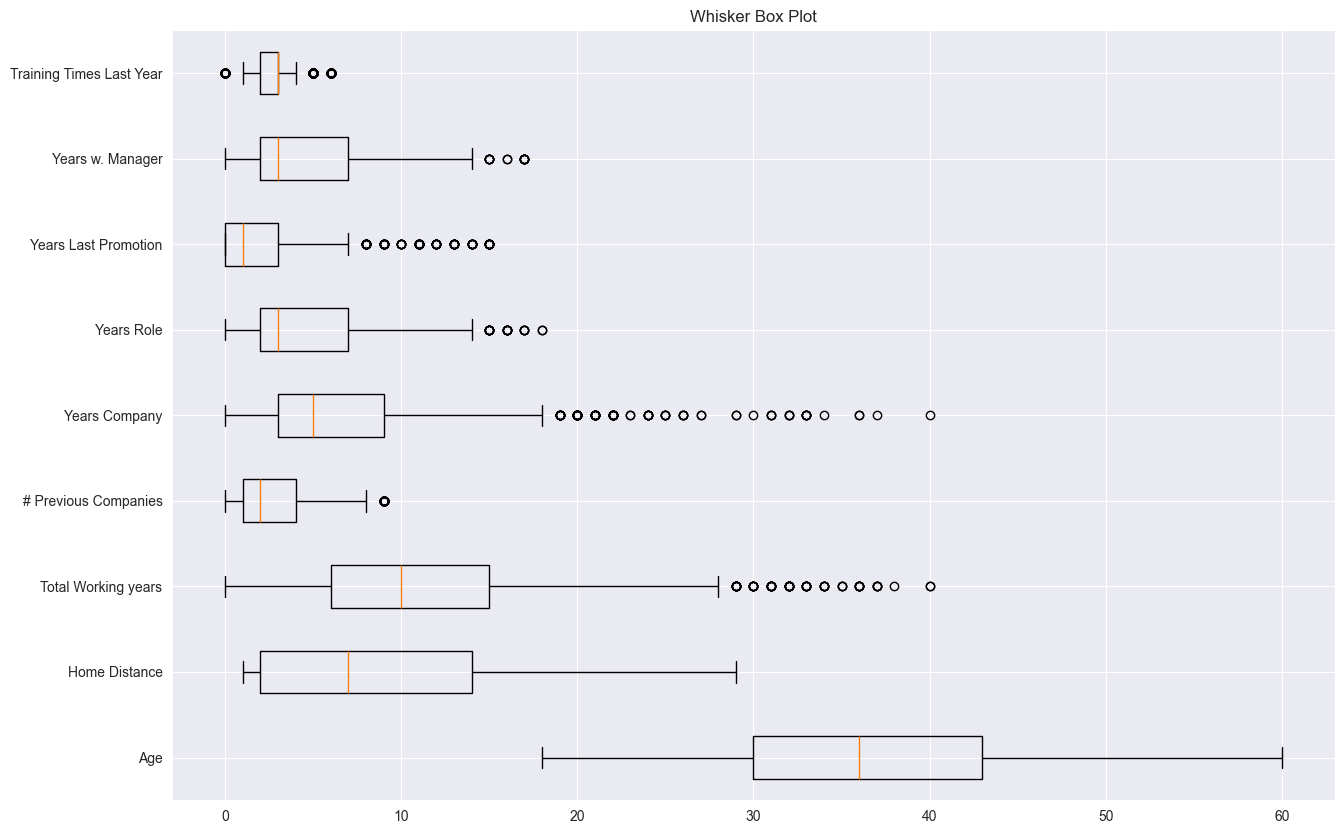

In [28]:
## 2 Phase - Data Analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.boxplot(
    [master_data['Age'], master_data['DistanceFromHome'],master_data['TotalWorkingYears'],
        master_data['NumCompaniesWorked'],master_data['YearsAtCompany'],
        master_data['YearsInCurrentRole'], master_data['YearsSinceLastPromotion'],master_data['YearsWithCurrManager'], master_data['TrainingTimesLastYear']],

        tick_labels=['Age', 'Home Distance','Total Working years', '# Previous Companies',
             'Years Company', 'Years Role','Years Last Promotion','Years w. Manager','Training Times Last Year'],

        orientation = 'horizontal')

plt.title('Whisker Box Plot')
plt.show()


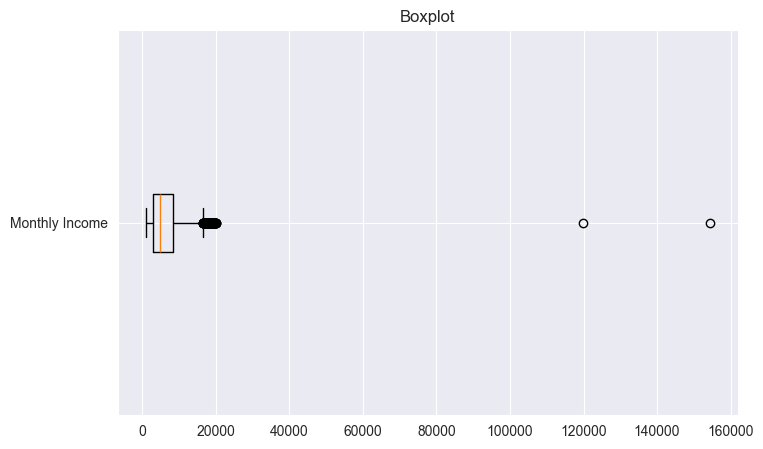

In [25]:
plt.figure(figsize=(8,5))
plt.boxplot(master_data['MonthlyIncome'], tick_labels=['Monthly Income'], orientation='horizontal')
plt.title('Boxplot')
plt.show()

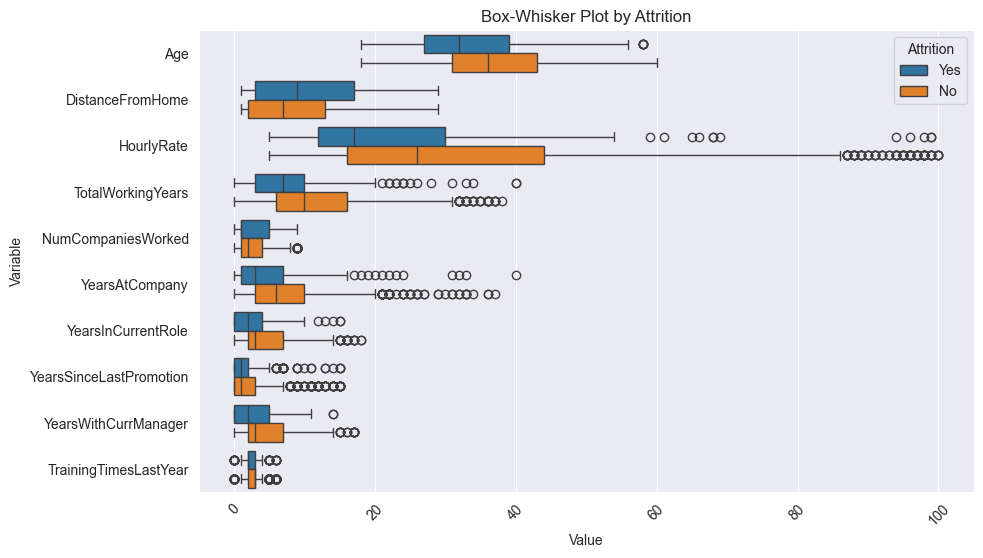

In [26]:
# 2. Box Whisker plot grouped by attrition:
import seaborn as sns

# We will identify a number of numeric_cols
numeric_cols = ['Age','DistanceFromHome','HourlyRate','TotalWorkingYears', 'NumCompaniesWorked', 'YearsAtCompany',
                'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear']

# Melt dataframe for seaborn (change the dataframe from wide to long)
df_melted = master_data.melt(id_vars='Attrition', value_vars=numeric_cols, var_name='Variable', value_name='Value')

# Create boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Value', y='Variable', hue='Attrition', data=df_melted, orientation='horizontal')
plt.title('Box-Whisker Plot by Attrition')
plt.xticks(rotation=45)  # rotate labels if many variables
plt.show()

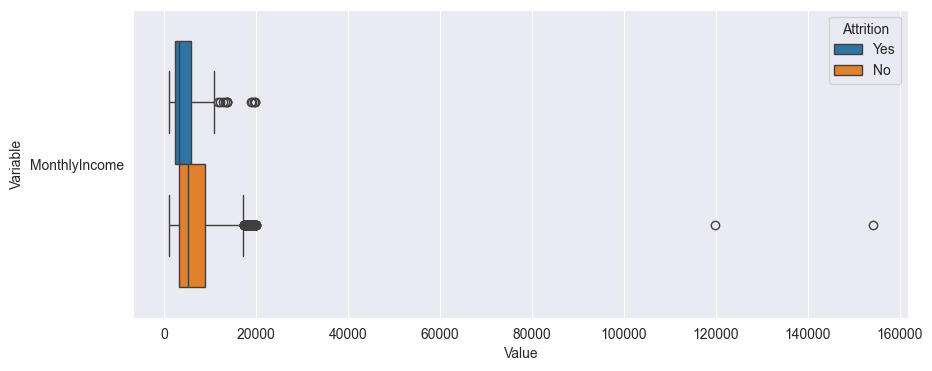

In [29]:
# MonthlyIncome has high values
numeric_cols2 = ['MonthlyIncome']

# Melt dataframe for seaborn (change the dataframe from wide to long)
df_melted2 = master_data.melt(id_vars='Attrition', value_vars=numeric_cols2, var_name='Variable', value_name='Value')

# Create boxplot
plt.figure(figsize=(10,4))
sns.boxplot(x='Value', y='Variable', hue='Attrition', data=df_melted2, orientation='horizontal')
plt.show()

In [191]:
# Df3
categorical_vars = ['Gender', 'Department_x', 'MaritalStatus', 'BusinessTravel', 'JobRole', 'OverTime']

# Loop over categorical variables
for var in categorical_vars:
    table = pd.crosstab(df3[var], df3['Attrition'], normalize='index') * 100
    table = table.rename(columns={0:'No Attrition (%)', 1:'Attrition (%)'})
    print(f"\nAttrition Rate by {var}:\n")
    print(table)


Attrition Rate by Gender:

Attrition  No Attrition (%)  Attrition (%)
Gender                                    
0                 85.254237      14.745763
1                 83.012458      16.987542

Attrition Rate by Department_x:

Attrition               No Attrition (%)  Attrition (%)
Department_x                                           
Human Resources                80.952381      19.047619
Research & Development         86.278586      13.721414
Sales                          79.241071      20.758929

Attrition Rate by MaritalStatus:

Attrition      No Attrition (%)  Attrition (%)
MaritalStatus                                 
Divorced              90.000000      10.000000
Married               87.500000      12.500000
Single                74.522293      25.477707

Attrition Rate by BusinessTravel:

Attrition          No Attrition (%)  Attrition (%)
BusinessTravel                                    
Non-Travel                92.052980       7.947020
Travel_Frequently         7

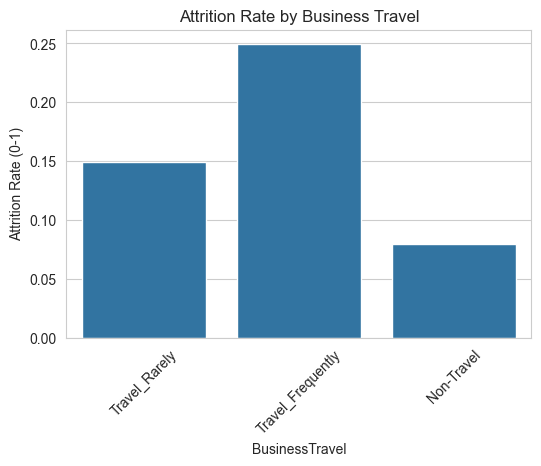

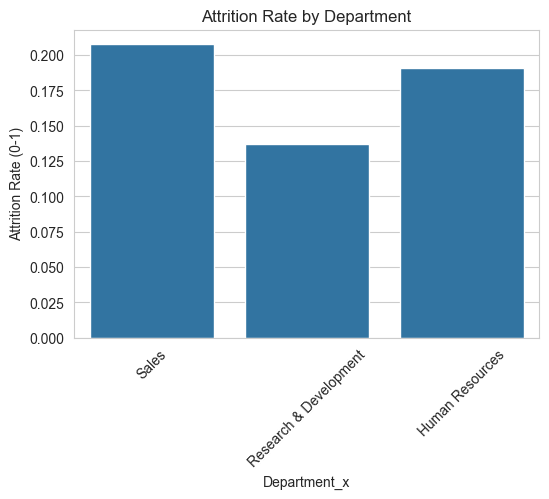

In [183]:
# Set style
sns.set_style("whitegrid")

# BusinessTravel
plt.figure(figsize=(6,4))
sns.barplot(x='BusinessTravel', y='Attrition', data=df3, errorbar=None)
plt.title('Attrition Rate by Business Travel')
plt.ylabel('Attrition Rate (0-1)')
plt.xticks(rotation=45)
plt.show()

# Attrition by Department
plt.figure(figsize=(6,4))
sns.barplot(x='Department_x', y='Attrition', data=df3, errorbar=None)
plt.title('Attrition Rate by Department')
plt.ylabel('Attrition Rate (0-1)')
plt.xticks(rotation=45)
plt.show()


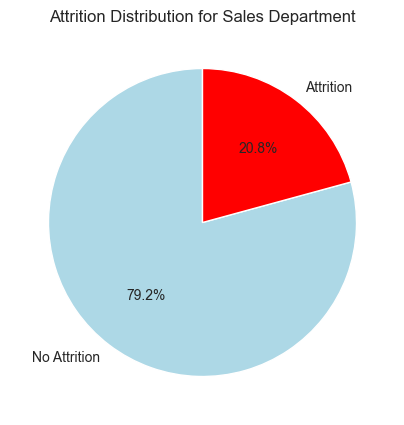

In [190]:
category = 'Sales'
subset = df3[df3['Department_x'] == category]['Attrition'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    subset,
    labels=['No Attrition', 'Attrition'],
    autopct='%1.1f%%',
    colors=['lightblue','red'],
    startangle=90
)
plt.title('Attrition Distribution for Sales Department')
plt.show()

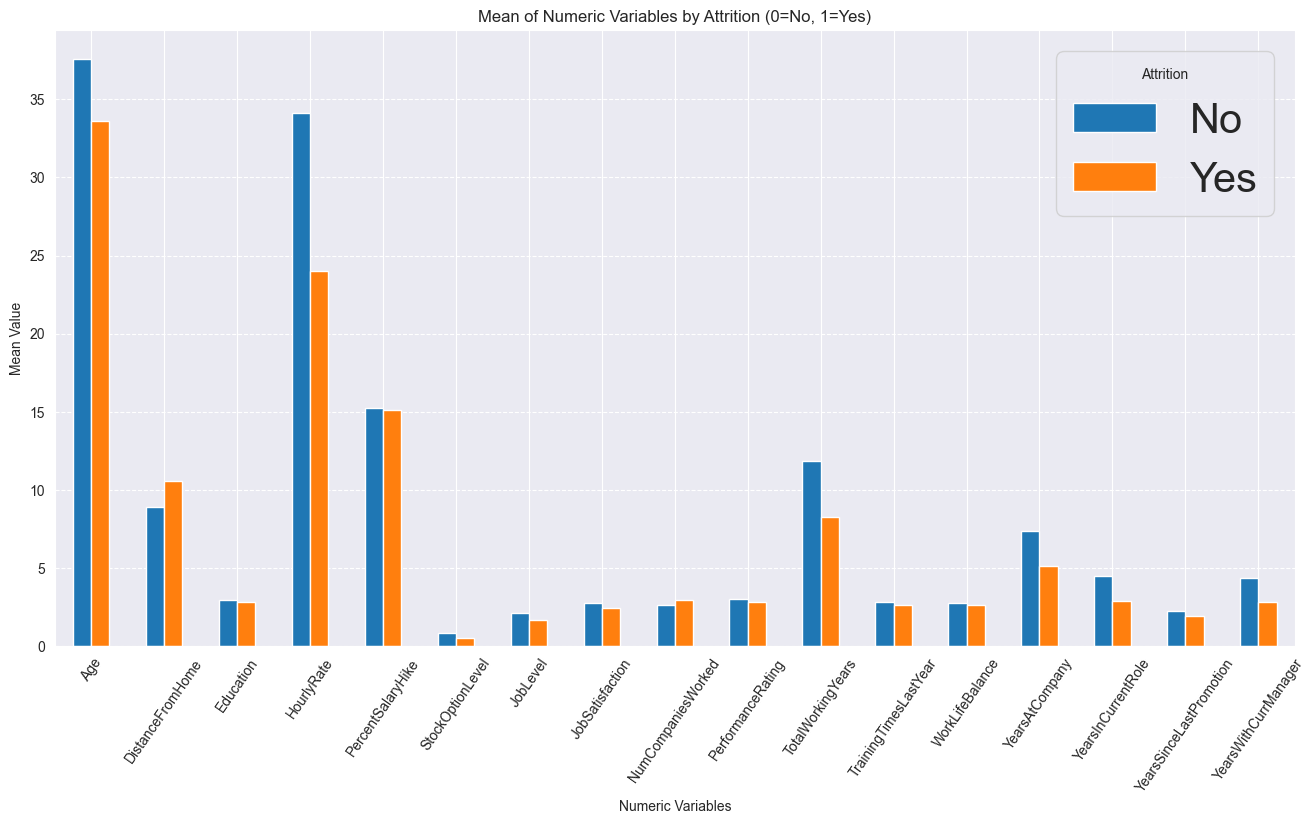

In [32]:
# Mean of numeric variables.

# Group by Attrition (0/1) and take the mean of numeric columns
# We create group of columns in order to have a better visualization.
sel_cols = ['Age', 'DistanceFromHome', 'Education', 'HourlyRate', 'PercentSalaryHike',
            'StockOptionLevel', 'JobLevel', 'JobSatisfaction','NumCompaniesWorked',
            'PerformanceRating', 'TotalWorkingYears','TrainingTimesLastYear', 'WorkLifeBalance',
            'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

the_mean = master_data.groupby("Attrition")[sel_cols].mean()

# Plot as bar chart
the_mean.T.plot(kind="bar", figsize=(16,8))
plt.title("Mean of Numeric Variables by Attrition (0=No, 1=Yes)")
plt.ylabel("Mean Value")
plt.xlabel("Numeric Variables")
plt.xticks(rotation=55)
plt.legend(fontsize= 30, title="Attrition")
plt.grid(axis='y', linestyle='--')
plt.show()

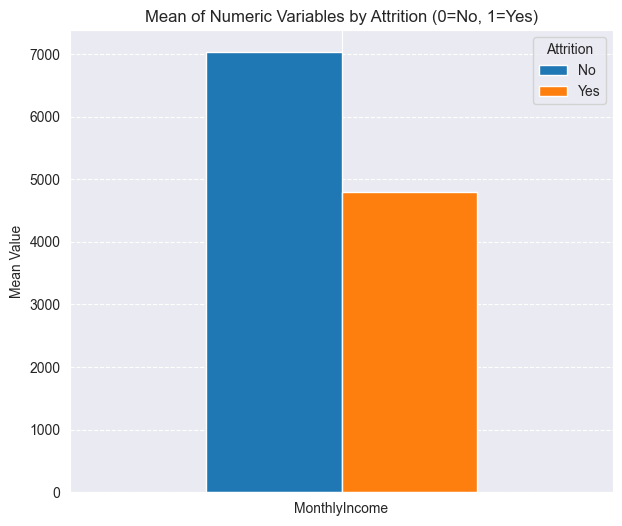

In [33]:
income = ['MonthlyIncome'] # Visualization created only for MonthlyIncome because of the high values.
the_mean2 = master_data.groupby("Attrition")[income].mean()

# Plot as bar chart
the_mean2.T.plot(kind="bar", figsize=(7,6))
plt.title("Mean of Numeric Variables by Attrition (0=No, 1=Yes)")
plt.ylabel("Mean Value")
plt.xticks(rotation=1800)
plt.legend(title="Attrition")
plt.grid(axis='y', linestyle='--')
plt.show()

In [108]:
# New DF's for different processes
df1 = master_data_1.copy() # For Heatmap, I
df2 = master_data_1.copy() # For Heatmap, II
df3 = master_data_1.copy() # For Binary Logistic Regression
df4 = master_data_1.copy() # For Binary Logistic Regression (Significant Variables)
df5 = master_data_1.copy() # For Binary Logistic Regression (Mixed Variables)

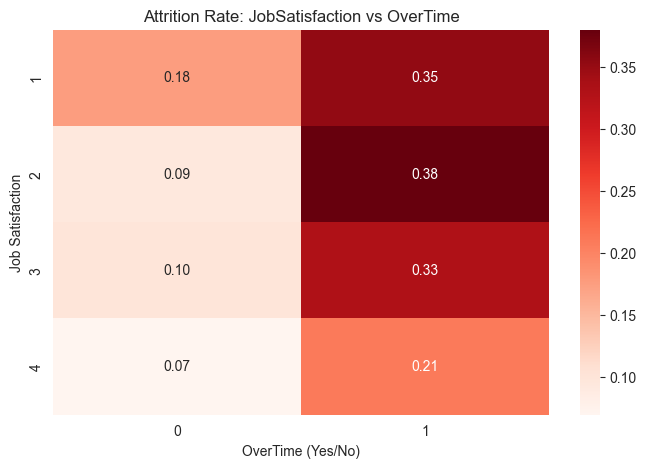

In [35]:
pivot_table = df1.pivot_table(
    index='JobSatisfaction',
    columns='OverTime',
    values='Attrition',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="Reds")
plt.title("Attrition Rate: JobSatisfaction vs OverTime")
plt.ylabel("Job Satisfaction")
plt.xlabel("OverTime (Yes/No)")
plt.show()

C:\Users\Windows\AppData\Local\Temp\ipykernel_24692\2563926553.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table2 = df2.pivot_table(


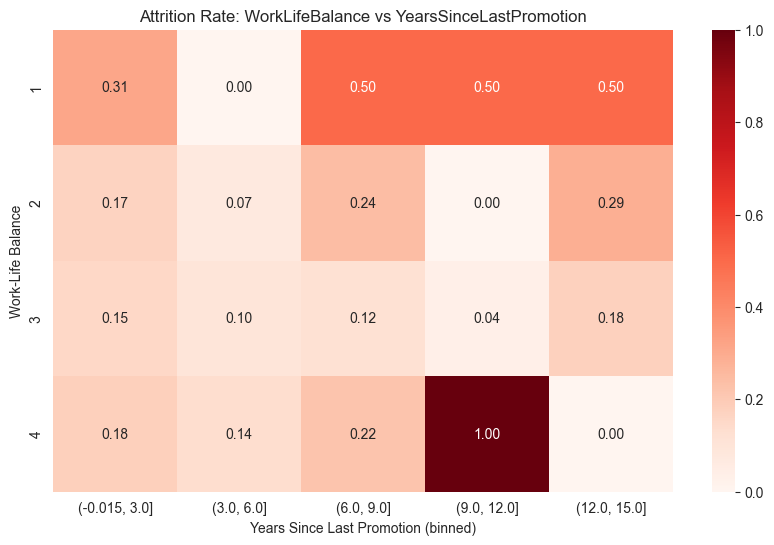

In [39]:
# Bins created for YearsSinceLastPromotion (e.g. 0-2, 2-4, etc.)
df2['PromotionBin'] = pd.cut(df2['YearsSinceLastPromotion'], bins=5)

# Create pivot table for attrition rate
pivot_table2 = df2.pivot_table(
    index='WorkLifeBalance',
    columns='PromotionBin',
    values='Attrition',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table2, annot=True, fmt=".2f", cmap="Reds")
plt.title("Attrition Rate: WorkLifeBalance vs YearsSinceLastPromotion")
plt.ylabel("Work-Life Balance")
plt.xlabel("Years Since Last Promotion (binned)")
plt.show()

#### Quick Visualization

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = master_data_2.drop('Attrition', axis=1), master_data_2['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
model.score(X_test, y_test)

0.8813559322033898

In [43]:
model.feature_importances_

array([0.07140318, 0.06017612, 0.02505294, 0.0117952 , 0.06014496,
       0.07591684, 0.04254683, 0.03262535, 0.02211045, 0.03067194,
       0.03770932, 0.02796546, 0.05387097, 0.0320071 , 0.02998651,
       0.04827186, 0.03305051, 0.03344106, 0.03508535, 0.05652507,
       0.00583097, 0.01416746, 0.00978457, 0.00220871, 0.00994939,
       0.00992914, 0.00246137, 0.0111412 , 0.00966884, 0.01151627,
       0.00358977, 0.00849742, 0.00227149, 0.00350429, 0.0083012 ,
       0.00186674, 0.00383904, 0.00029011, 0.00757497, 0.00887814,
       0.00778902, 0.00832333, 0.01040317, 0.01785637])

In [149]:
sorted_importances = dict(sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x: x[1], reverse = True))

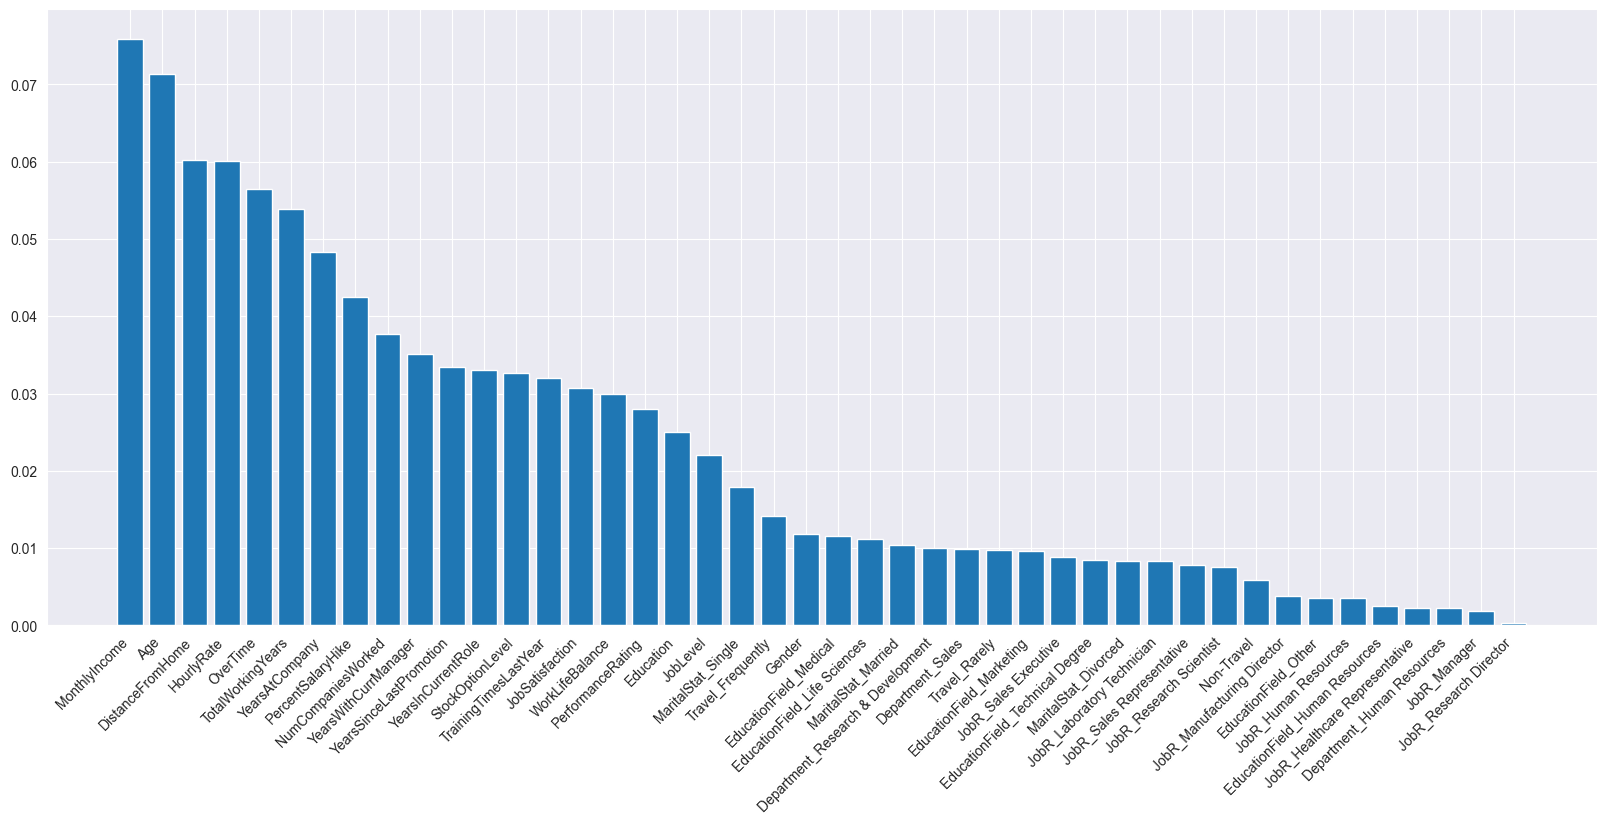

In [45]:
plt.figure(figsize=(20,8))
plt.bar(sorted_importances.keys(), sorted_importances.values())
plt.xticks(rotation=45, ha = 'right')
plt.show()

## 3 Phase - Attrition Model using Binary Logistic Regression

In [46]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [47]:
# Normal variables without one hot encoding
X_train, X_test = train_test_split(df3, test_size=0.20,random_state = 0)

In [48]:
X_train.shape # shape of the array

(1178, 26)

In [49]:
X_test.shape # shape of the array

(295, 26)

#### BLR - All variables

In [50]:
# To create attrition model
att_model = smf.logit(
    formula="""Attrition ~ Age + DistanceFromHome + Education + Gender + HourlyRate + MonthlyIncome +
    PercentSalaryHike + StockOptionLevel + JobLevel + JobSatisfaction + NumCompaniesWorked +
    TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole +
    YearsSinceLastPromotion + YearsWithCurrManager + Department_x + EducationField + MaritalStatus + BusinessTravel + JobRole + OverTime""",
    data=X_train
).fit()

         Current function value: 0.297355
         Iterations: 35


C:\Users\Windows\PycharmProjects\DSprojects\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
print(att_model.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1178
Model:                          Logit   Df Residuals:                     1139
Method:                           MLE   Df Model:                           38
Date:                Thu, 20 Nov 2025   Pseudo R-squ.:                  0.3312
Time:                        20:44:30   Log-Likelihood:                -350.28
converged:                      False   LL-Null:                       -523.73
Covariance Type:            nonrobust   LLR p-value:                 1.659e-51
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                -17.8954   1.69e+04     -0.001      0.999   -3.31e+04    3.31e+04
Department_x[T.Research & Development]    18.76

In [53]:
# To check multicolinearity

X0 = att_model.model.exog # Get design matrix from model
feature_names = att_model.model.exog_names

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = feature_names
vif_data["VIF"] = [variance_inflation_factor(X0, i) for i in range(X0.shape[1])]

print(vif_data)

                                   feature         VIF
0                                Intercept  292.195885
1   Department_x[T.Research & Development]   41.527709
2                    Department_x[T.Sales]   43.629914
3          EducationField[T.Life Sciences]   25.975790
4              EducationField[T.Marketing]   11.529401
5                EducationField[T.Medical]   23.232729
6                  EducationField[T.Other]    6.383618
7       EducationField[T.Technical Degree]    9.243309
8                 MaritalStatus[T.Married]    1.851523
9                  MaritalStatus[T.Single]    3.070543
10     BusinessTravel[T.Travel_Frequently]    2.343325
11         BusinessTravel[T.Travel_Rarely]    2.369952
12              JobRole[T.Human Resources]    6.448691
13        JobRole[T.Laboratory Technician]    3.296644
14                      JobRole[T.Manager]    4.155817
15       JobRole[T.Manufacturing Director]    2.037647
16            JobRole[T.Research Director]    2.753013
17        

In [54]:
# Train Data

# Get predicted probabilities for the positive class (Attrition=1)
# y_true = df3['Attrition']  # actual values
y_pred_prob_att = att_model.predict(X_train)  # predicted probabilities

# 2. ROC and AUC curve
Lfpr, Ltpr, thresholds = roc_curve(X_train['Attrition'], y_pred_prob_att)
auc_score = roc_auc_score(X_train['Attrition'], y_pred_prob_att)
print(f"AUC: {auc_score:.4f}")

AUC: 0.8694


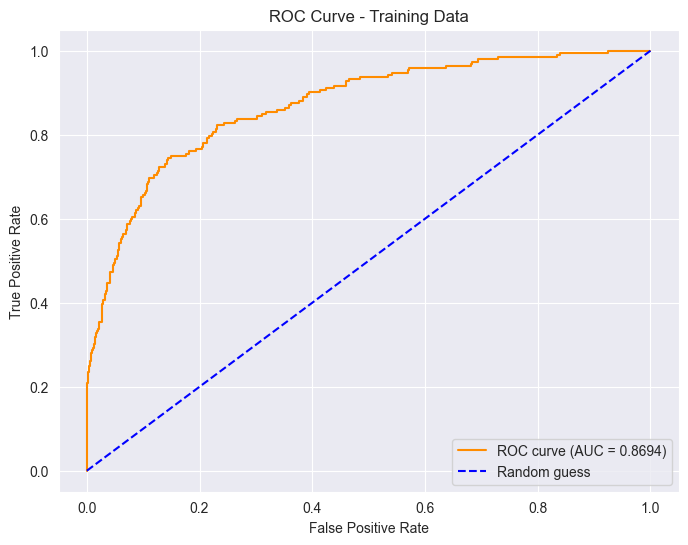

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(Lfpr, Ltpr, color='darkorange', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0,1], [0,1], color='blue', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [56]:
# Test Data

# Get predicted probabilities for the positive class (Attrition=1)
# y_true = df3['Attrition']  # actual values
y_pred_prob_att1 = att_model.predict(X_test)  # predicted probabilities

# 2. ROC and AUC curve
Lfpr, Ltpr, thresholds = roc_curve(X_test['Attrition'], y_pred_prob_att1)
auc_score = roc_auc_score(X_test['Attrition'], y_pred_prob_att1)
print(f"AUC: {auc_score:.4f}")

AUC: 0.7436


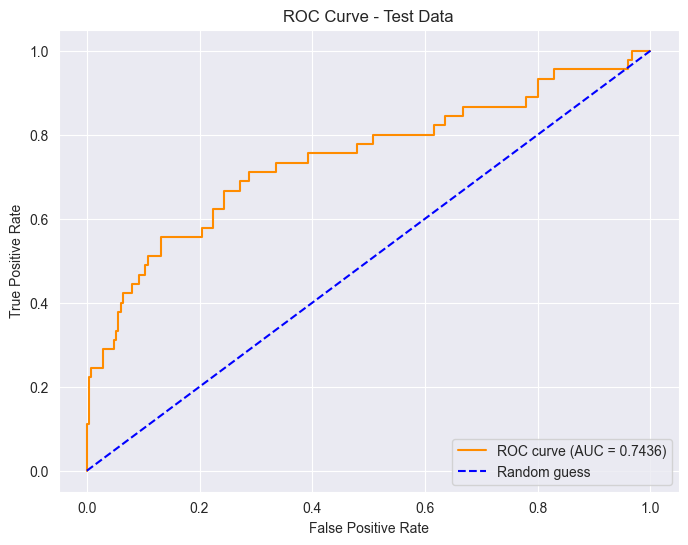

In [57]:
plt.figure(figsize=(8,6))
plt.plot(Lfpr, Ltpr, color='darkorange', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0,1], [0,1], color='blue', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### BLR - Significant variables

In [92]:
reduced_model = smf.logit(
    formula="""
        Attrition ~
        MaritalStatus + BusinessTravel + JobRole + Gender + OverTime +
        Age + DistanceFromHome + JobSatisfaction + TotalWorkingYears + NumCompaniesWorked +
        TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany +
        YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager
    """,
    data=X_train
).fit()
print(reduced_model.summary())

Optimization terminated successfully.
         Current function value: 0.305378
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1178
Model:                          Logit   Df Residuals:                     1152
Method:                           MLE   Df Model:                           25
Date:                Thu, 20 Nov 2025   Pseudo R-squ.:                  0.3131
Time:                        21:35:08   Log-Likelihood:                -359.73
converged:                       True   LL-Null:                       -523.73
Covariance Type:            nonrobust   LLR p-value:                 1.393e-54
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -1.0136      0.911 

In [93]:
# To check multicolinearity
# Get design matrix from model
X1 = reduced_model.model.exog
feature_names = reduced_model.model.exog_names

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = feature_names
vif_data["VIF"] = [variance_inflation_factor(X1, i) for i in range(X1.shape[1])]

print(vif_data)

                                feature        VIF
0                             Intercept  79.224925
1              MaritalStatus[T.Married]   1.692489
2               MaritalStatus[T.Single]   1.719252
3   BusinessTravel[T.Travel_Frequently]   2.320710
4       BusinessTravel[T.Travel_Rarely]   2.332432
5            JobRole[T.Human Resources]   1.391414
6      JobRole[T.Laboratory Technician]   2.654282
7                    JobRole[T.Manager]   1.929676
8     JobRole[T.Manufacturing Director]   2.026173
9          JobRole[T.Research Director]   1.636703
10        JobRole[T.Research Scientist]   2.938650
11           JobRole[T.Sales Executive]   2.890464
12      JobRole[T.Sales Representative]   1.642532
13                               Gender   1.026918
14                             OverTime   1.030890
15                                  Age   2.082790
16                     DistanceFromHome   1.012155
17                      JobSatisfaction   1.013499
18                    TotalWork

In [94]:
# Train data
# 1. Get predicted probabilities for the positive class (Attrition=1)
# y_true = df3['Attrition']  # actual values
y_pred_prob = reduced_model.predict(X_train)  # predicted probabilities

# 2. ROC and AUC curve
lfpr, ltpr, thresholds = roc_curve(X_train['Attrition'], y_pred_prob)
auc_score = roc_auc_score(X_train['Attrition'], y_pred_prob)
print(f"AUC: {auc_score:.4f}")

AUC: 0.8615


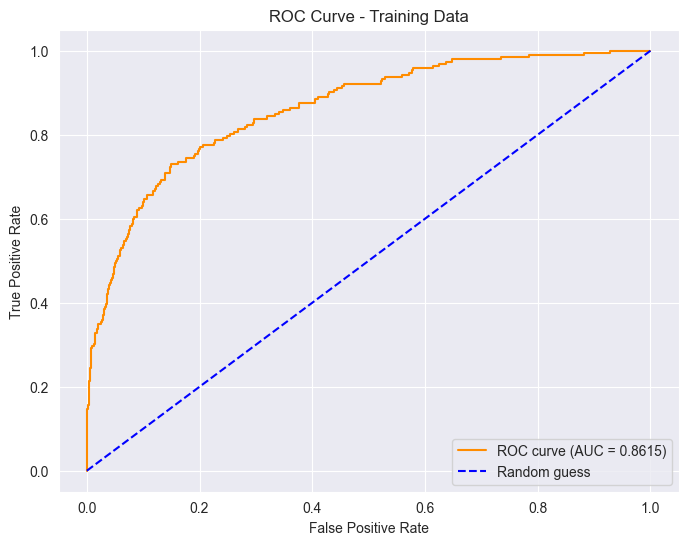

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(lfpr, ltpr, color='darkorange', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0,1], [0,1], color='blue', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [96]:
# 6.	Obtain classification table and accuracy (%)
threshold=0.5
predicted_class1=np.zeros(y_pred_prob.shape)
predicted_class1[y_pred_prob>threshold]=1

print(classification_report(X_train['Attrition'],predicted_class1))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       986
           1       0.72      0.37      0.49       192

    accuracy                           0.87      1178
   macro avg       0.80      0.67      0.71      1178
weighted avg       0.86      0.87      0.86      1178



In [97]:
# Train data - Optimal threshold

# 3. Compute Youden's J statistic (tpr - fpr)
youden_j = ltpr - lfpr

# 4. Find index of maximum J
optimal_idx = np.argmax(youden_j)

# 5. Obtain the optimal threshold
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold: ", optimal_threshold)

Optimal threshold:  0.23354498872271182


In [98]:
# Test data

# 1. Get predicted probabilities for the positive class (Attrition=1)
# y_true = df3['Attrition']  # actual values
y_pred_prob_t = reduced_model.predict(X_test)  # predicted probabilities

# 2. ROC and AUC curve
lfpr, ltpr, thresholds = roc_curve(X_test['Attrition'], y_pred_prob_t)
auc_score = roc_auc_score(X_test['Attrition'], y_pred_prob_t)
print(f"AUC: {auc_score:.4f}")

AUC: 0.7573


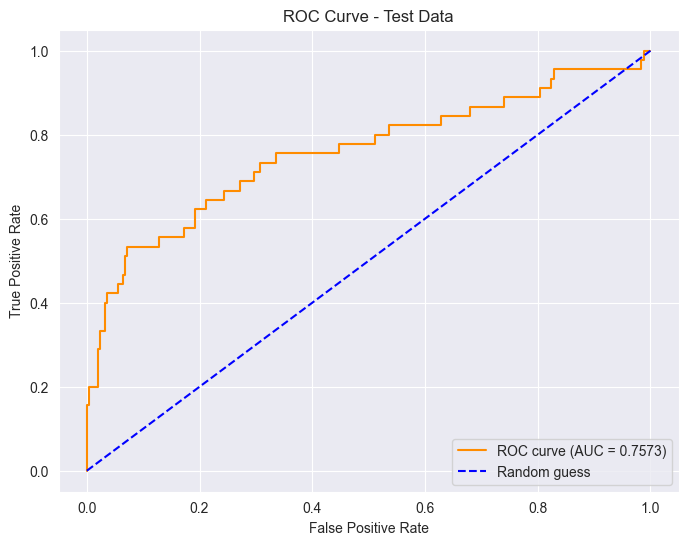

In [99]:
plt.figure(figsize=(8,6))
plt.plot(lfpr, ltpr, color='darkorange', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0,1], [0,1], color='blue', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [100]:
# Classification table
predicted_class2=np.zeros(y_pred_prob_t.shape)
predicted_class2[y_pred_prob_t>threshold]=1

print(classification_report(X_test['Attrition'],predicted_class2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       250
           1       0.69      0.40      0.51        45

    accuracy                           0.88       295
   macro avg       0.80      0.68      0.72       295
weighted avg       0.87      0.88      0.87       295



In [101]:
# Confusion matrix: rows = actual, columns = predicted
cm = confusion_matrix(X_test['Attrition'], predicted_class2)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[242   8]
 [ 27  18]]


In [102]:
# Extract values
TN, FP, FN, TP = cm.ravel() # flattens the 2×2 matrix into a 1D array (e.g.: cm[0,0])

# Sensitivity and Specificity formulas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Sensitivity: 0.4
Specificity: 0.968


#### BLR - Mixed variables

In [103]:
mixed_model = smf.logit(
    formula="""Attrition ~ Age + DistanceFromHome + Education + Gender + MonthlyIncome +
    PercentSalaryHike + StockOptionLevel + JobSatisfaction + NumCompaniesWorked +
    TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole +
    YearsSinceLastPromotion + YearsWithCurrManager + MaritalStatus + BusinessTravel + JobRole + OverTime""",
    data=X_train
).fit()

Optimization terminated successfully.
         Current function value: 0.303301
         Iterations 9


In [104]:
# Train data

# 1. Get predicted probabilities for the positive class (Attrition=1)
# y_true = df3['Attrition']  # actual values
y_pred_prob_mix = mixed_model.predict(X_train)  # predicted probabilities

# 2. ROC and AUC curve
fpr, tpr, thresholds = roc_curve(X_train['Attrition'], y_pred_prob_mix)
auc_score = roc_auc_score(X_train['Attrition'], y_pred_prob_mix)
print(f"AUC: {auc_score:.4f}")

AUC: 0.8643


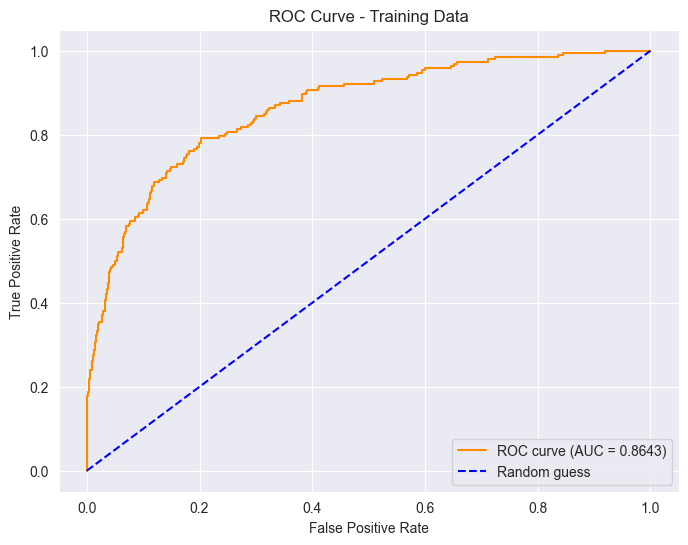

In [105]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0,1], [0,1], color='blue', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [106]:
# Test Data

# 1. Get predicted probabilities for the positive class (Attrition=1)
# y_true = df3['Attrition']  # actual values
y_pred_prob_mix1 = mixed_model.predict(X_test)  # predicted probabilities

# 2. ROC and AUC curve
fpr, tpr, thresholds = roc_curve(X_test['Attrition'], y_pred_prob_mix1)
auc_score = roc_auc_score(X_test['Attrition'], y_pred_prob_mix1)
print(f"AUC: {auc_score:.4f}")

AUC: 0.7542


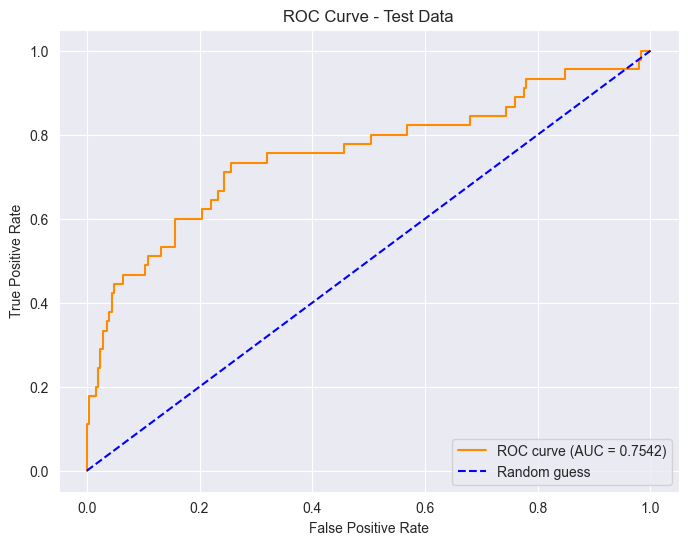

In [107]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0,1], [0,1], color='blue', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

AUC: 0.7573. Binary Logistic regression performs better when it uses only statistically significant predictors.
Adding unnecessary variables tends to reduce performance slightly.

## 4 Phase - ML Methods

In [109]:
# One hot encoding to the master data.
master_data_1 = master_data_1.join(pd.get_dummies(master_data_1["BusinessTravel"])).drop('BusinessTravel', axis=1)
master_data_1 = master_data_1.join(pd.get_dummies(master_data_1["Department_x"], prefix='Department')).drop('Department_x', axis=1)
master_data_1 = master_data_1.join(pd.get_dummies(master_data_1["EducationField"], prefix='EducationField')).drop('EducationField', axis=1)
master_data_1 = master_data_1.join(pd.get_dummies(master_data_1["JobRole"], prefix='JobR')).drop('JobRole', axis=1)
master_data_1 = master_data_1.join(pd.get_dummies(master_data_1["MaritalStatus"], prefix='MaritalStat')).drop('MaritalStatus', axis=1)

# Boolean being managed
master_data_1 = master_data_1.map(lambda x: 1 if x is True else 0 if x is False else x)
master_data_1.sample(3)

df6 = master_data_1.copy() # Naïve Bayes Method

#### Naive Bayes Method

In [111]:

from sklearn.naive_bayes import GaussianNB
x_variables =['Age', 'DistanceFromHome', 'Education', 'Gender',
        'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel',
        'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
        'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'OverTime',
        'Non-Travel', 'Travel_Frequently',
        'Department_Human Resources', 'Department_Research & Development',
        'EducationField_Human Resources',
        'EducationField_Life Sciences', 'EducationField_Marketing',
        'EducationField_Medical', 'EducationField_Other',
        'JobR_Healthcare Representative',
        'JobR_Human Resources', 'JobR_Laboratory Technician', 'JobR_Manager',
        'JobR_Manufacturing Director', 'JobR_Research Director',
        'JobR_Research Scientist', 'JobR_Sales Executive',
        'MaritalStat_Divorced', 'MaritalStat_Married']
X = df6.loc[:,x_variables]
y = df6.loc[:,'Attrition']


# # When we create dummies, we do not use all the new columns created. One should be eliminated.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 0)


In [112]:
# Create and fit the Gaussian Naive Bayes model
NBmodel = GaussianNB()

NBmodel.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


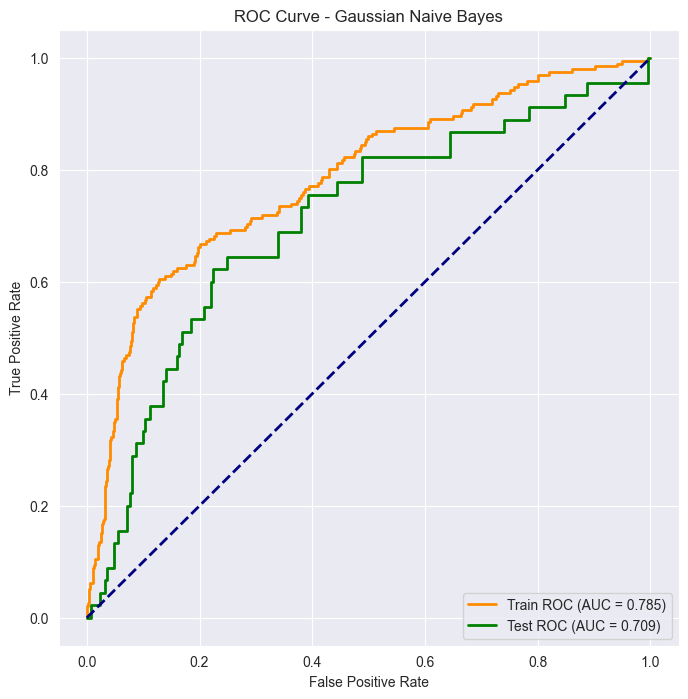

In [113]:
# Prediction for train and test data

y_pred_train = NBmodel.predict_proba(X_train)[:,1]
y_pred_test = NBmodel.predict_proba(X_test)[:,1]

# Train Data
auc_train = roc_auc_score(y_train, y_pred_train)
fpr_gnb_train, tpr_gnb_train, _ = roc_curve(y_train, y_pred_train)

# Test Data
auc_test = roc_auc_score(y_test, y_pred_test)
fpr_gnb_test, tpr_gnb_test, _ = roc_curve(y_test, y_pred_test)

# Plot
plt.figure(figsize=(8,8))
lw = 2

# Train curve
plt.plot(fpr_gnb_train, tpr_gnb_train, color='darkorange', lw=lw,
         label='Train ROC (AUC = %0.3f)' % auc_train)

# Test curve
plt.plot(fpr_gnb_test, tpr_gnb_test, color='green', lw=lw,
         label='Test ROC (AUC = %0.3f)' % auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [114]:
# Confusion Matrix for TRAIN DATA

y_pred_naives = NBmodel.predict(X_train)

cm_n_train = confusion_matrix(y_train,y_pred_naives)
print(cm_n_train)

[[620 366]
 [ 50 142]]


In [115]:
# Confusion Matrix for TEST DATA

y_pred_naives = NBmodel.predict(X_test)

cm_n_test = confusion_matrix(y_test,y_pred_naives)
print(cm_n_test)

[[145 105]
 [ 11  34]]


#### Decision Tree Method

In [116]:
from sklearn.tree import DecisionTreeClassifier

dtcl = DecisionTreeClassifier(criterion='entropy', min_samples_split= int(len(X_train)*.10))
dtcl.fit(X_train, y_train)

# Prediction for train and test data

y_pred_train_prob = dtcl.predict_proba(X_train)[:,1]
y_pred_test_prob = dtcl.predict_proba(X_test)[:,1]

# Train
auc_train = roc_auc_score(y_train, y_pred_train_prob)
fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, y_pred_train_prob)

# Test
auc_test = roc_auc_score(y_test, y_pred_test_prob)
fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, y_pred_test_prob)

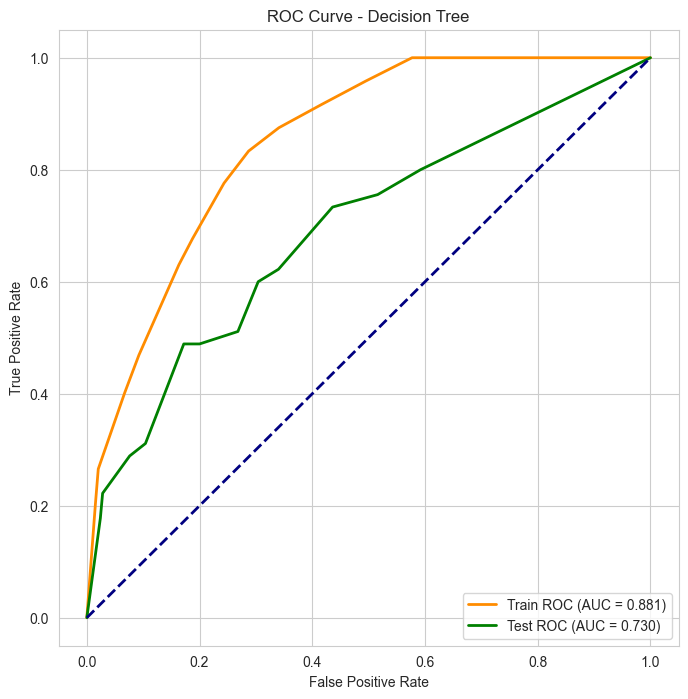

In [192]:
plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr_dt_train, tpr_dt_train, color='darkorange', lw=lw,
         label='Train ROC (AUC = %0.3f)' % auc_train)

plt.plot(fpr_dt_test, tpr_dt_test, color='green', lw=lw,
         label='Test ROC (AUC = %0.3f)' % auc_test)

plt.plot([0,1],[0,1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [119]:
# Train data
y_pred_dt = dtcl.predict(X_train)
cm_tr_dt = confusion_matrix(y_train, y_pred_dt)
TN, FP, FN, TP = cm_tr_dt.ravel()
print(cm_tr_dt)
print(f"Accuracy: {(TN+TP)/(TN+FP+FN+TP):.2f}")
print(f"Sensitivity: {TP/(TP+FN):.2f}")
print(f"Specificity: {TN/(TN+FP):.2f}\n")

[[966  20]
 [141  51]]
Accuracy: 0.86
Sensitivity: 0.27
Specificity: 0.98



In [120]:
# Test data
y_pred_test_class = dtcl.predict(X_test)
cm_test_dt = confusion_matrix(y_test, y_pred_test_class)
TN, FP, FN, TP = cm_test_dt.ravel()
print(cm_test_dt)
print(f"Accuracy: {(TN+TP)/(TN+FP+FN+TP):.2f}")
print(f"Sensitivity: {TP/(TP+FN):.2f}")
print(f"Specificity: {TN/(TN+FP):.2f}")

[[243   7]
 [ 35  10]]
Accuracy: 0.86
Sensitivity: 0.22
Specificity: 0.97


#### Random Forest Method

In [122]:
#Building Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0, class_weight='balanced', n_estimators=100, min_samples_split=0.1, #'balanced' for better 1 results
oob_score=True, max_features='sqrt')
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,0.1
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [123]:
# Prediction for train and test data
y_pred_train = rf.predict_proba(X_train)[:, 1]
y_pred_test = rf.predict_proba(X_test)[:, 1]

# Train Data
auc_train = roc_auc_score(y_train, y_pred_train)
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train, y_pred_train)

# Test Data
auc_test = roc_auc_score(y_test, y_pred_test)
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, y_pred_test)

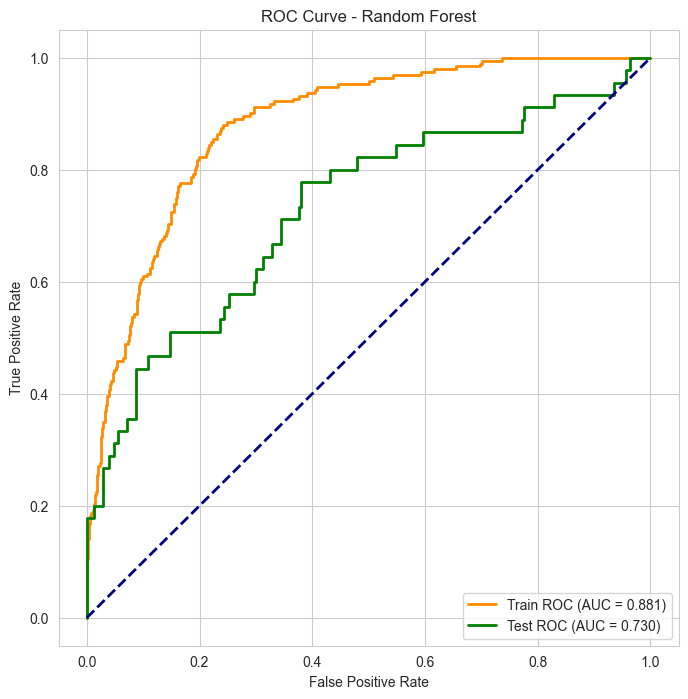

In [193]:
plt.figure(figsize=(8,8))
lw = 2

# Train curve
plt.plot(fpr_rf_train, tpr_rf_train, color='darkorange', lw=lw,
         label='Train ROC (AUC = %0.3f)' % auc_train)

# Test curve
plt.plot(fpr_rf_test, tpr_rf_test, color='green', lw=lw,
         label='Test ROC (AUC = %0.3f)' % auc_test)

# Diagonal line (random guess)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [125]:
# Confusion Matrix for TRAIN DATA

y_pred_rf = rf.predict(X_train)
cm_tr_rf = confusion_matrix(y_train, y_pred_rf)

print(cm_tr_rf)

[[798 188]
 [ 40 152]]


In [126]:
# Confusion Matrix for TEST DATA

y_pred_rf_test = rf.predict(X_test)
cm_test_rf = confusion_matrix(y_test, y_pred_rf_test)

print(cm_test_rf)

[[195  55]
 [ 22  23]]


Among the logistic models, the significant variables model performs better and gives the best AUC: 0.7573. The result with ML methods are slightly lower. Naive Bayes, 0.709; Decision Tree, 0.691; Random Forest, 0.730. In conclusion, Binary Logistic Regression with significant variables provides the strongest and most reliable predictive performance.

## 5 Phase - Text Mining

In [128]:
# Import text/comments from EE's
hrtext = [line.rstrip() for line in open("C:/Users/Windows/Documents/GitHub/HR-Analytics-Predicting-and-Understanding-Employee-Attrition/Dataset/comments.txt", "r", encoding= "utf-8")]
hrtext[0:3]

['Management sometimes overlooked the ways they could utilize my role, so I occasionally felt somewhat stagnant.',
 'The best thing you can do for new employees is to make sure they understand their roles and supply them with the tools they need to perform their job. I didn’t always feel as though I had the resources to do my job well, so I think new employees can benefit from more thorough and frequent training',
 'A comprehensive benefits package would make the job more appealing']

In [129]:
import contractions

# Join corpus into one string (1 dimension)
text = " ".join(hrtext).lower()
# Expand contractions
text = contractions.fix(text)

In [130]:
import re
# No special characters or spaces
text = re.sub(r'[^a-zA-Z\s]', '', text)

In [131]:
words = text.split() # Split (e.g: Hello World to Hello, World)

In [133]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Just the first time: nltk.download('averaged_perceptron_tagger_eng')

lemmatizer = WordNetLemmatizer() # Normalize text (running > run)

# Map NLTK POS → WordNet POS
def map_pos(tag):
    return {
        'J': wordnet.ADJ,
        'V': wordnet.VERB,
        'N': wordnet.NOUN
    }.get(tag[0], None)

# Efficient lemmatization (function created)
def fast_lemmatize(words1):
    tagged = pos_tag(words)
    return [
        lemmatizer.lemmatize(word, map_pos(tag))
        for word, tag in tagged
        if map_pos(tag) is not None
    ]

# Apply
words = fast_lemmatize(words)

In [134]:
# Extended Stop Words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Custom words that appear in performance reviews and HR texts
extra = {
    "also", "always", "boss", "company", "could",
    "day", "days", "employee", "employees", "even", "feel", "felt",
    "get", "give", "given", "got", "however", "job", "need", "needs", "never",
    "make", "management", "manager","many", "might", "much",
    "one",    "people", "put", "really", "role",
    "should", "sometimes", "something", "someone", "still",
    "take", "team", "thing", "things", "think",
    "want", "work", "working", "would", "year", "years"
}

stop_words |= extra

# Apply stopwords
words = [w for w in words if w not in stop_words]

In [135]:
# Removing very short words

words = [w for w in words if 3 <= len(w) <= 15] # Keep only the words that are between 3 and 15 letters long

In [136]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) # More english word not needed
words = [word for word in words if word not in stop_words]

#custom_stopwords = ['example', 'text']  # For words we specifically do not need
#words = [word for word in words if word not in custom_stopwords]

In [137]:
# Merge again and ready for the WordCloud
clean_text = " ".join(words)
clean_text

'overlook way utilize stagnant best new sure understand supply tool perform resource new benefit thorough frequent train comprehensive benefit package appeal good opportunity new place salary major demotivating factor term requirement wish care parent old care move place nearer wfh new employment provide last month handle lot responsibility try extend ask support term resource good planning somehow main reason change challenge opportunity grow culture look misplace organization hence leave speak bos compensation unnoticed disappointing personal issue reason leave love place leave manage personal issue aware bos time seek opportunity choice leave training past nothing learn promotion profile growth happen look training grow benefit package offer new appeal stock benefit senior propose consider change move healthcare hence important grab opportunity quick promotion good reward recognition good compensation offer immense analytic experience benefit month procurement department exit proces

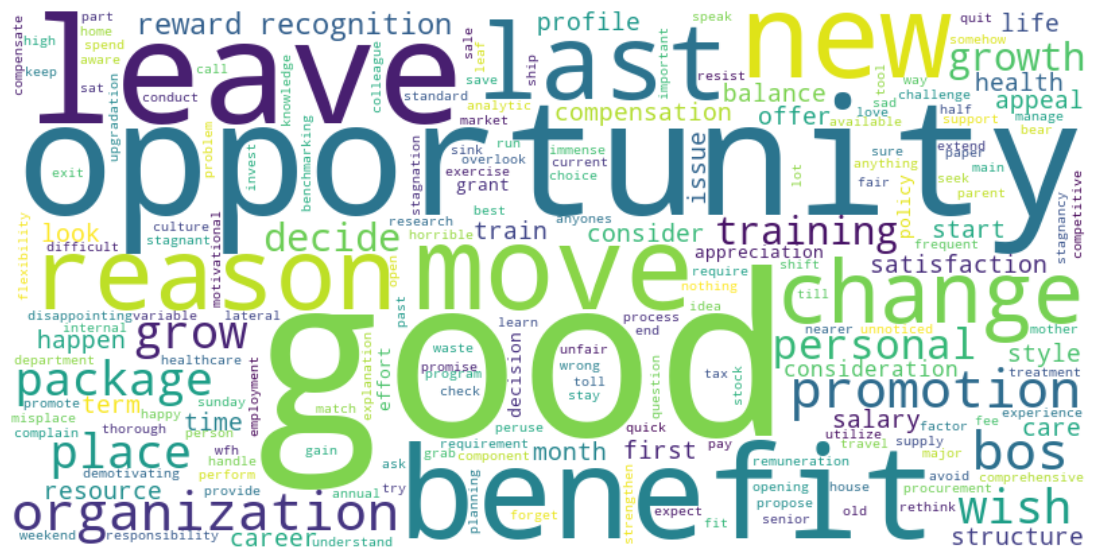

In [138]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Model created

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=200, colormap='viridis').generate(clean_text)

# Plot

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [139]:
# Quick sentiment analysis
from textblob import TextBlob

blob = TextBlob(clean_text)
sentiment = blob.sentiment

print("Polarity:", sentiment.polarity)   # -1 (negative) a 1 (positive)
print("Subjectivity:", sentiment.subjectivity)  # 0 (objective) a 1 (subjective)

Polarity: 0.16863493424814177
Subjectivity: 0.4931122546216885


In [140]:
from nltk.sentiment import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
scores = sia.polarity_scores(clean_text)

print(scores)

{'neg': 0.096, 'neu': 0.527, 'pos': 0.377, 'compound': 0.9989}


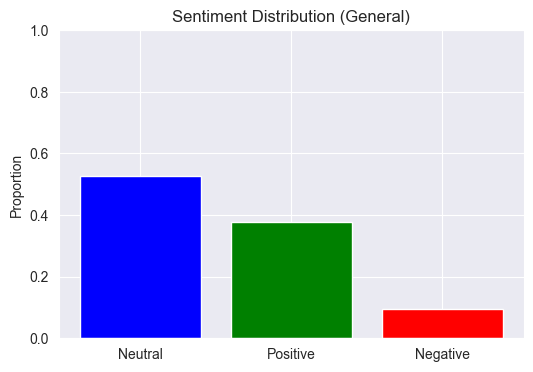

In [166]:
import matplotlib.pyplot as plt

# Labels and values
labels = ['Positive', 'Neutral', 'Negative']
values = [scores['pos'], scores['neu'], scores['neg']]
colors = ['green', 'blue', 'red']

# Sort descending
sorted_items = sorted(zip(values, labels, colors), reverse=True)
sorted_values, sorted_labels, sorted_colors = zip(*sorted_items)

# Plot
plt.figure(figsize=(6,4))
plt.bar(sorted_labels, sorted_values, color=sorted_colors)
plt.title('Sentiment Distribution (General)')
plt.ylabel('Proportion')
plt.ylim(0,1)
plt.show()

#### Sentiment Analysis

In [142]:
# Perform sentiment analysis

# Only first time: nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [143]:
comments = hrtext  # original text lines

In [144]:
sentiments = [] # Dataset

for comment in comments:
    score = sia.polarity_scores(comment)
    sentiments.append(score)

# Examples of 5 first comments
for i, s in enumerate(sentiments[:5]):
    print(f"Comment {i+1}: {s}")

Comment 1: {'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'compound': -0.0258}
Comment 2: {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.891}
Comment 3: {'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'compound': 0.5574}
Comment 4: {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.6705}
Comment 5: {'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.7096}


In [145]:
# Threshold to distribute every comment.
def label_sentiment(compound):
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

sentiment_labels = [label_sentiment(s['compound']) for s in sentiments]

# Example of 10 comments
for comment, label in zip(comments[:10], sentiment_labels[:10]):
    print(f"{label}: {comment}")

Neutral: Management sometimes overlooked the ways they could utilize my role, so I occasionally felt somewhat stagnant.
Positive: The best thing you can do for new employees is to make sure they understand their roles and supply them with the tools they need to perform their job. I didn’t always feel as though I had the resources to do my job well, so I think new employees can benefit from more thorough and frequent training
Positive: A comprehensive benefits package would make the job more appealing
Positive: Better opportunities in the new work place
Positive: I felt the salary was a major demotivating factor in terms of my job requirement. I wish this was taken care of
Positive: My parents are old now and I am the only one to take care of them. I wanted to move to a place nearer to them. WFH is what the new employment provides me
Positive: In last some months, I had been handling a lot of responsibilities. I tried to extend myself. I had asked for more support in terms of resources 

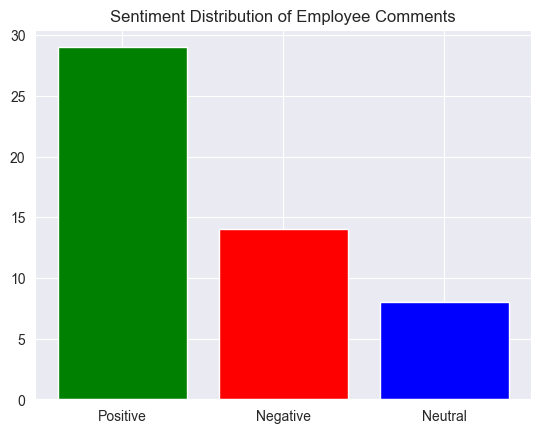

In [162]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the labels
counter = Counter(sentiment_labels)

# Sort by count descending
labels, values = zip(*sorted(counter.items(), key=lambda x: x[1], reverse=True))

# Plot
colors = ['green','red','blue']
plt.bar(labels, values, color=colors)
plt.title("Sentiment Distribution of Employee Comments")
plt.show()